<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/01_PyCaret_for_Regression_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Regression**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering
---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html" target="_blank"> Click Here</a>** 

2. Documentation on Pycaret-Regression: **<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html" target="_blank"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data
- Setting up Environment
- Create Model
- Tune Model
- Plot Model
- Finalize Model
- Predict Model
- Save / Load Model
---



### **(a) Install Pycaret**

In [ ]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [ ]:
from pycaret.utils import version
version()

'2.3.10'

---
# **1. Regression: Basics**
---
### **1.1 Get the list of datasets available in pycaret (Total Datasets = 55)**




In [ ]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "boston" dataset (Step-I)**
---

In [ ]:
bostonDataSet = get_data("boston")    # SN is 46

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
### **1.3 Parameter setting for all models (Step-II)**
---

In [ ]:
from pycaret.regression import *
s = setup(data =  bostonDataSet, target='medv', silent=True)
# Re-Run if error occurs

# Other Parameters:
# train_size = 0.7
# data_split_shuffle = False

,Description,Value
0,session_id,4851
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='medv',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

---
### **1.4 Run all models (Step-III)**
---

In [ ]:
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.9948,7.8950,2.7292,0.8966,0.1230,0.0990,0.206
lightgbm,Light Gradient Boosting Machine,2.1791,9.9740,3.0264,0.8726,0.1359,0.1071,0.098
gbr,Gradient Boosting Regressor,2.2015,10.0563,3.0703,0.8689,0.1409,0.1104,0.092
rf,Random Forest Regressor,2.2779,11.8222,3.2992,0.8460,0.1451,0.1132,0.277
ada,AdaBoost Regressor,2.6691,13.3085,3.5635,0.8190,0.1629,0.1369,0.087
lr,Linear Regression,3.1987,20.5217,4.4344,0.7269,0.2389,0.1574,0.313
ridge,Ridge Regression,3.1959,20.6603,4.4484,0.7253,0.2362,0.1580,0.011
br,Bayesian Ridge,3.2071,21.0066,4.4919,0.7202,0.2322,0.1586,0.012
dt,Decision Tree Regressor,3.1752,20.7777,4.4080,0.7188,0.1975,0.1540,0.015
lasso,Lasso Regression,3.6304,25.5661,4.9807,0.6592,0.2412,0.1699,0.012


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=4851, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **1.5 "Three line of code" for model comparison for "Boston" dataset**
---



In [ ]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")
setup(data = bostonDataSet, target='medv', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.3272,11.4302,3.3253,0.8604,0.1459,0.1160,0.293
gbr,Gradient Boosting Regressor,2.2705,11.1330,3.2217,0.8590,0.1473,0.1164,0.093
et,Extra Trees Regressor,2.2211,11.8799,3.3430,0.8572,0.1448,0.1110,0.221
lightgbm,Light Gradient Boosting Machine,2.4708,14.2112,3.6876,0.8277,0.1580,0.1221,0.036
ada,AdaBoost Regressor,2.7725,13.9424,3.6754,0.8267,0.1713,0.1458,0.091
dt,Decision Tree Regressor,2.9736,16.8754,4.0137,0.7809,0.1854,0.1482,0.016
lr,Linear Regression,3.6013,26.1042,4.9413,0.6910,0.2647,0.1752,0.012
ridge,Ridge Regression,3.5704,26.2653,4.9686,0.6885,0.2788,0.1750,0.010
lar,Least Angle Regression,3.6560,26.5187,4.9786,0.6848,0.2643,0.1780,0.014
br,Bayesian Ridge,3.5925,27.1093,5.0675,0.6781,0.2672,0.1768,0.012


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=6584, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **1.6 "Three line of code" for model comparison for "Insurance" dataset**
---



In [ ]:
from pycaret.datasets import get_data
from pycaret.regression import *

insuranceDataSet = get_data("insurance")
setup(data = insuranceDataSet, target='charges', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2698.6476,2.318984e+07,4795.6772,0.8313,0.4432,0.3211,0.090
lightgbm,Light Gradient Boosting Machine,2904.4090,2.496395e+07,4973.2353,0.8178,0.5232,0.3603,0.050
rf,Random Forest Regressor,2768.2664,2.515694e+07,4999.8798,0.8171,0.4570,0.3137,0.321
ada,AdaBoost Regressor,4317.7575,2.918713e+07,5386.1577,0.7884,0.6437,0.7475,0.028
et,Extra Trees Regressor,2835.6403,2.976466e+07,5435.7679,0.7806,0.4750,0.3143,0.277
ridge,Ridge Regression,4293.2865,3.866139e+07,6187.4054,0.7217,0.6259,0.4476,0.011
llar,Lasso Least Angle Regression,4278.2271,3.864545e+07,6187.1243,0.7217,0.5939,0.4449,0.014
br,Bayesian Ridge,4291.4032,3.866290e+07,6187.5723,0.7217,0.6239,0.4473,0.013
lasso,Lasso Regression,4282.9640,3.866315e+07,6187.8732,0.7215,0.6296,0.4456,0.016
lr,Linear Regression,4282.5290,3.866630e+07,6188.1039,0.7215,0.6285,0.4455,0.015


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1721, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
# **2. Regression: working with user dataset**
---
### **2.1 Download the "boston" dataset to local system** 
---

In [ ]:
bostonDataSet.to_csv("bostonDataSet.csv", index=False)

from google.colab import files
files.download('bostonDataSet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **2.2 Uploading "user file" from user system**

In [ ]:
from google.colab import files
files.upload()

---
### **2.3 "Read" the uploaded file**
---

In [ ]:
import pandas as pd
myDataSet = pd.read_csv('bostonDataSet (1).csv')
myDataSet.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
### **2.4 "Compare" the model performance**
---

In [ ]:
from pycaret.regression import *
setup(data = myDataSet, target='medv', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1537,9.5040,3.0152,0.8885,0.1428,0.1131,0.093
et,Extra Trees Regressor,2.1655,11.6324,3.2010,0.8711,0.1422,0.1092,0.309
rf,Random Forest Regressor,2.3551,12.1007,3.3809,0.8578,0.1528,0.1218,0.547
lightgbm,Light Gradient Boosting Machine,2.4570,13.5618,3.6101,0.8431,0.1583,0.1242,0.037
ada,AdaBoost Regressor,2.8669,15.9614,3.8992,0.8111,0.1874,0.1557,0.095
lr,Linear Regression,3.6086,26.2176,5.0191,0.6967,0.2810,0.1803,0.022
lar,Least Angle Regression,3.6573,26.2378,5.0211,0.6962,0.2857,0.1837,0.029
ridge,Ridge Regression,3.5754,26.7226,5.0563,0.6918,0.2749,0.1795,0.026
dt,Decision Tree Regressor,3.1820,25.8384,4.6816,0.6874,0.1957,0.1597,0.028
br,Bayesian Ridge,3.6345,27.9250,5.1599,0.6791,0.2666,0.1823,0.024


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5371, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **2.5 "Three line of code" for model comparison for "user dataset**
##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine
---

In [ ]:
from pycaret.regression import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")
#s = setup(data = myDataSet, target='cancer'), silent=True)
#cm = compare_models()

---
# **3. Regression: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [ ]:
setup(data = bostonDataSet, target = 'medv', 
      normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1306,10.3103,3.1016,0.8693,0.1388,0.1103,0.094
et,Extra Trees Regressor,2.1058,10.4989,3.1451,0.8692,0.1333,0.1050,0.213
lightgbm,Light Gradient Boosting Machine,2.3623,12.4282,3.4798,0.8384,0.1483,0.1181,0.038
rf,Random Forest Regressor,2.3932,13.1430,3.5386,0.8348,0.1522,0.1202,0.290
knn,K Neighbors Regressor,2.7314,16.8728,3.9788,0.7957,0.1661,0.1321,0.015
ada,AdaBoost Regressor,2.8870,17.7711,4.0790,0.7772,0.1832,0.1525,0.090
br,Bayesian Ridge,3.3614,25.7371,4.9361,0.6872,0.2354,0.1716,0.015
dt,Decision Tree Regressor,3.2672,24.6022,4.8133,0.6848,0.2174,0.1680,0.015
huber,Huber Regressor,3.1995,26.8519,4.9472,0.6847,0.2442,0.1584,0.032
ridge,Ridge Regression,3.4299,25.8577,4.9569,0.6844,0.2396,0.1753,0.011


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1846, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.2 Model performance using "Feature Selection"**
---

In [ ]:
setup(data = bostonDataSet, target = 'medv', 
      feature_selection = True, feature_selection_method = 'classic',
      feature_selection_threshold = 0.2,  silent=True)
cm = compare_models()

#feature_selection_method = {classic, boruta}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2880,11.3345,3.2821,0.8446,0.1658,0.1251,0.183
gbr,Gradient Boosting Regressor,2.4089,13.1839,3.4814,0.8211,0.1745,0.1326,0.075
rf,Random Forest Regressor,2.4864,13.8497,3.6230,0.8139,0.1745,0.1344,0.256
lightgbm,Light Gradient Boosting Machine,2.5228,14.6917,3.7486,0.8049,0.1806,0.1371,0.034
ada,AdaBoost Regressor,2.8197,16.0474,3.9053,0.7815,0.1945,0.1599,0.082
dt,Decision Tree Regressor,3.2757,26.5849,4.9815,0.6400,0.2444,0.1829,0.012
br,Bayesian Ridge,3.8851,31.1582,5.5071,0.6239,0.2717,0.1966,0.011
ridge,Ridge Regression,3.8546,31.0754,5.4998,0.6231,0.2744,0.1969,0.010
lr,Linear Regression,3.8529,31.0909,5.5011,0.6227,0.2748,0.1970,0.012
lar,Least Angle Regression,3.9036,31.6194,5.5535,0.6127,0.2749,0.1995,0.011


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1006, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.3 Model performance using "Outlier Removal"**
---

In [ ]:
setup(data = bostonDataSet, target = 'medv', 
      remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.3020,10.9233,3.2386,0.8341,0.1402,0.1108,0.094
rf,Random Forest Regressor,2.3135,11.9836,3.3689,0.8304,0.1429,0.1116,0.286
et,Extra Trees Regressor,2.2730,12.0463,3.3690,0.8287,0.1394,0.1067,0.210
lightgbm,Light Gradient Boosting Machine,2.5822,14.3844,3.6747,0.8022,0.1522,0.1215,0.036
ada,AdaBoost Regressor,2.9290,16.9395,3.9979,0.7445,0.1831,0.1531,0.091
lar,Least Angle Regression,3.3156,24.9647,4.8119,0.6534,0.2496,0.1582,0.014
lr,Linear Regression,3.3099,25.0460,4.8152,0.6525,0.2475,0.1574,0.013
ridge,Ridge Regression,3.2827,24.9756,4.7982,0.6518,0.2535,0.1568,0.011
br,Bayesian Ridge,3.2960,25.3124,4.8295,0.6478,0.2518,0.1576,0.013
dt,Decision Tree Regressor,3.1874,22.0129,4.5987,0.6476,0.1976,0.1587,0.017


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4884, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.4 Model performance using "Transformation"**
---

In [ ]:
setup(data = bostonDataSet, target = 'medv', 
      transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.2967,12.3530,3.4335,0.8405,0.1485,0.1170,0.036
et,Extra Trees Regressor,2.2376,12.0532,3.3662,0.8381,0.1448,0.1121,0.213
gbr,Gradient Boosting Regressor,2.3805,13.6544,3.6241,0.8169,0.1536,0.1197,0.087
rf,Random Forest Regressor,2.4654,15.2377,3.8148,0.7981,0.1623,0.1247,0.283
ada,AdaBoost Regressor,2.9622,18.2330,4.1711,0.7624,0.1893,0.1574,0.090
knn,K Neighbors Regressor,2.8822,19.4641,4.3315,0.7476,0.1812,0.1391,0.014
br,Bayesian Ridge,3.3707,20.9461,4.5361,0.7393,0.2170,0.1740,0.012
ridge,Ridge Regression,3.4057,21.0136,4.5423,0.7380,0.2176,0.1756,0.013
lr,Linear Regression,3.4203,21.0776,4.5489,0.7371,0.2179,0.1763,0.013
huber,Huber Regressor,3.3080,22.0509,4.6480,0.7273,0.2294,0.1699,0.033


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=6638, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.5 Model performance using "PCA"**
---

In [ ]:
setup(data = bostonDataSet, target = 'medv', 
      pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.1705,57.1615,7.4406,0.3234,0.2887,0.2448,0.168
lightgbm,Light Gradient Boosting Machine,5.4053,60.0678,7.6326,0.2933,0.2940,0.2535,0.031
rf,Random Forest Regressor,5.4609,62.5147,7.7843,0.2646,0.3035,0.2617,0.215
lr,Linear Regression,5.6459,67.0588,8.0281,0.2417,0.3086,0.2630,0.011
lasso,Lasso Regression,5.6479,67.0586,8.0282,0.2417,0.3086,0.2633,0.013
ridge,Ridge Regression,5.6459,67.0588,8.0281,0.2417,0.3086,0.2630,0.010
en,Elastic Net,5.6470,67.0582,8.0281,0.2417,0.3086,0.2631,0.013
lar,Least Angle Regression,5.6459,67.0588,8.0281,0.2417,0.3086,0.2630,0.011
gbr,Gradient Boosting Regressor,5.3880,63.6703,7.8347,0.2412,0.2998,0.2535,0.056
br,Bayesian Ridge,5.6751,67.1710,8.0367,0.2404,0.3095,0.2653,0.011


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=4154, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [ ]:
setup(data = bostonDataSet, target = 'medv', 
      remove_outliers = True, outliers_threshold = 0.05,
      normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1267,9.9922,3.0210,0.8857,0.1373,0.1062,0.210
gbr,Gradient Boosting Regressor,2.3096,10.8932,3.2253,0.8731,0.1543,0.1199,0.092
rf,Random Forest Regressor,2.3052,12.3584,3.3955,0.8590,0.1506,0.1155,0.286
lightgbm,Light Gradient Boosting Machine,2.5459,13.9407,3.6151,0.8380,0.1642,0.1287,0.037
ada,AdaBoost Regressor,2.7342,14.6733,3.7047,0.8303,0.1775,0.1449,0.090
knn,K Neighbors Regressor,3.1289,21.9627,4.5416,0.7504,0.1886,0.1471,0.016
dt,Decision Tree Regressor,3.1927,24.2807,4.7968,0.7164,0.2065,0.1611,0.014
br,Bayesian Ridge,3.5015,25.2567,4.9162,0.7151,0.2539,0.1728,0.011
ridge,Ridge Regression,3.5497,25.2605,4.9246,0.7136,0.2550,0.1744,0.011
lr,Linear Regression,3.5752,25.3643,4.9381,0.7120,0.2560,0.1755,0.011


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=448, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [ ]:
setup(data = bostonDataSet, target = 'medv',
      remove_outliers = True, outliers_threshold = 0.05, 
      normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.0520,8.8240,2.8766,0.8752,0.1398,0.1087,0.093
rf,Random Forest Regressor,2.1687,10.4480,3.1160,0.8539,0.1447,0.1126,0.280
et,Extra Trees Regressor,2.1315,10.6512,3.1301,0.8509,0.1432,0.1096,0.209
lightgbm,Light Gradient Boosting Machine,2.3096,11.8271,3.3396,0.8388,0.1573,0.1201,0.036
ada,AdaBoost Regressor,2.6483,13.4722,3.5385,0.8149,0.1725,0.1457,0.085
knn,K Neighbors Regressor,2.8586,17.1887,4.0605,0.7591,0.1811,0.1470,0.015
br,Bayesian Ridge,3.1063,18.4534,4.2123,0.7490,0.2241,0.1671,0.011
ridge,Ridge Regression,3.1458,18.5594,4.2264,0.7467,0.2233,0.1680,0.011
lr,Linear Regression,3.1681,18.6867,4.2420,0.7444,0.2236,0.1687,0.012
huber,Huber Regressor,3.0703,19.0414,4.2760,0.7409,0.2316,0.1609,0.028


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3784, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.3**
- **<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html" target="_blank"> Click Here</a>** for more

---
# **4. Regression: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [ ]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")    # SN is 46
setup(data =  bostonDataSet, target='medv', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6782,9.1269,3.0211,0.9103,0.1271,0.1262
1,1.8578,5.4263,2.3294,0.9262,0.1114,0.0939
2,1.4851,3.7010,1.9238,0.9316,0.0979,0.0782
3,3.1011,18.5502,4.3070,0.8444,0.2116,0.1561
4,1.6099,3.7420,1.9344,0.9331,0.1168,0.0939
5,2.0639,7.0558,2.6563,0.8262,0.1279,0.1095
6,3.2680,37.5901,6.1311,0.5405,0.1802,0.1282
7,2.3476,19.3020,4.3934,0.8078,0.1649,0.1203
8,2.0052,7.2407,2.6909,0.8653,0.1434,0.1065


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=5752, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


---
### **4.2 Other available regression models**
---
-	'ada' - AdaBoost Regressor
-	'br' - Bayesian Ridge
-	'dt' - Decision Tree Regressor
-	'en'	- Elastic Net
-	'et' - Extra Trees Regressor
-	'gbr' - Gradient Boosting Regressor
-	'huber' - Huber Regressor
-	'knn' - K Neighbors Regressor
-	'llar' - Lasso Least Angle Regression
-	'lasso' - Lasso Regression
-	'lar' - Least Angle Regression
-	'lightgbm'	- Light Gradient Boosting Machine
-	'lr' - Linear Regression
-	'omp' - Orthogonal Matching Pursuit
-	'par' - Passive Aggressive Regressor
-	'rf' - Random Forest Regressor
-	'ridge' - Ridge Regression

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.create_model" target="_blank"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [ ]:
# Select top 10 rows from boston dataset
newDataSet = get_data("boston").iloc[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Make prediction on "new unseen dataset"**

In [ ]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=5752, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.3664,3.4336,1.853,0.9173,0.0638,0.0504


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.851000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.171000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.716000
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,36.993000
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.556001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,26.200000
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,22.094000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,23.640000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,16.698000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,19.925000


---
### **4.5 "Scatter plot" b/w actual and predicted** 
---

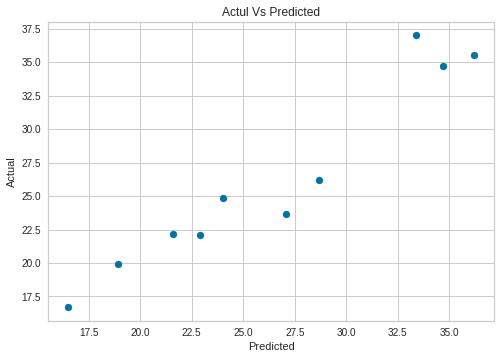

In [ ]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

---
### **4.6 Download the "Scatter plot"** 
---

In [ ]:
from google.colab import files
files.download('result-scatter-plot.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **4.7 "Save" and "Download" the prediction result** 
---

In [ ]:
from google.colab import files

newPredictions.to_csv("NewPredictions.csv", index=False)
files.download('NewPredictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **4.8 "Save" the trained model** 
---

In [ ]:
sm = save_model(rfModel, 'rfModelFile')

---
### **4.9 Download the "trained model file" to user local system** 
---

In [ ]:
from google.colab import files
files.download('rfModelFile.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **4.10  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
### **4.10.1 Upload the  "Trained Model"**


In [ ]:
from google.colab import files
files.upload()

---
### **4.10.2 Load the "Model"**
---

In [ ]:
rfModel = load_model('rfModelFile (1)')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=rfModelFile (1), platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


---
### **4.10.3 Make the prediction on "new unseen dataset"**
---

In [ ]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='medv',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                             

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.3664,3.4336,1.853,0.9173,0.0638,0.0504


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.851000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.171000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.716000
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,36.993000
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.556001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,26.200000
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,22.094000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,23.640000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,16.698000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,19.925000


---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**

- Prediction Error Plot    - 'error'
- Learning Curve           - 'learning'
- Validation Curve         - 'vc'
- Feature Importance       - 'feature'
- Model Hyperparameter     - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [ ]:
rfModel = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6782,9.1269,3.0211,0.9103,0.1271,0.1262
1,1.8578,5.4263,2.3294,0.9262,0.1114,0.0939
2,1.4851,3.7010,1.9238,0.9316,0.0979,0.0782
3,3.1011,18.5502,4.3070,0.8444,0.2116,0.1561
4,1.6099,3.7420,1.9344,0.9331,0.1168,0.0939
5,2.0639,7.0558,2.6563,0.8262,0.1279,0.1095
6,3.2680,37.5901,6.1311,0.5405,0.1802,0.1282
7,2.3476,19.3020,4.3934,0.8078,0.1649,0.1203
8,2.0052,7.2407,2.6909,0.8653,0.1434,0.1065


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 6
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=5752, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


---
### **5.2 Plot the "error"**
---

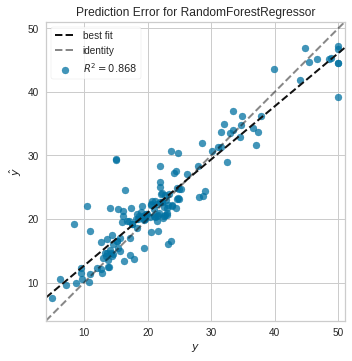

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rfModel, plot='error')

---
### **5.3 Plot the "learning curve"**
---

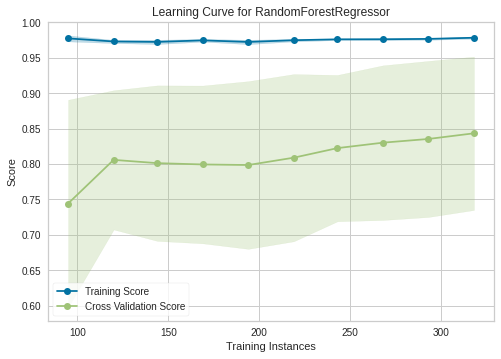

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "validation curve"**
---

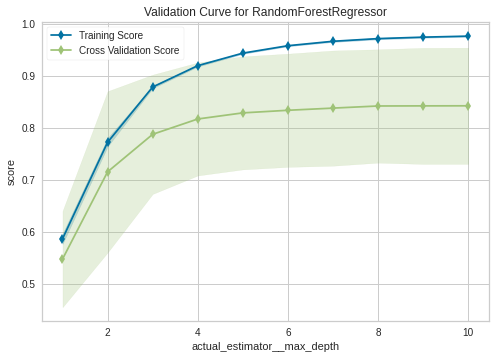

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rfModel, plot='vc')

---
### **5.5 Get the model "parameters"**
---

In [ ]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


---
### **5.6 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.plot_model" target="_blank"> Click Here </a>**

---
# **6. Feature Importance**
---
### **6.1 Feature Importance using "Random Forest"**


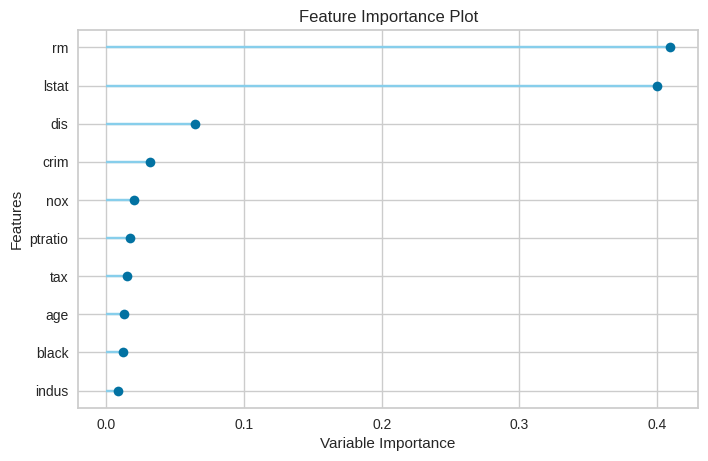

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

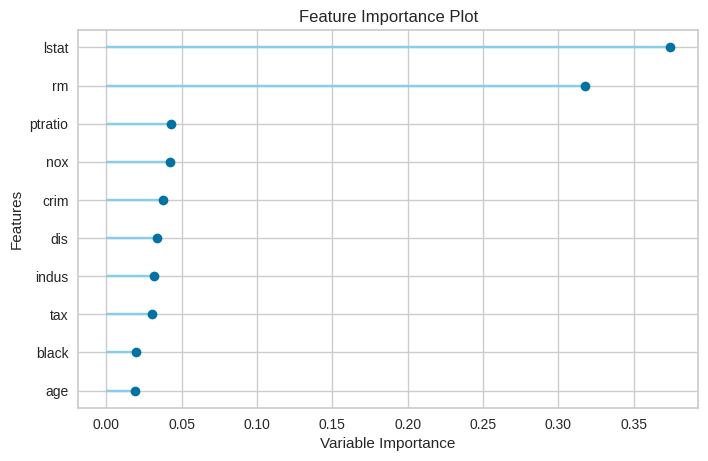

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

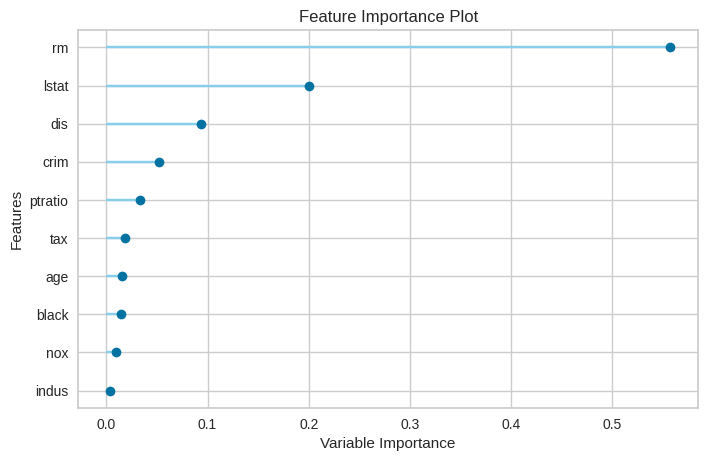

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [ ]:
dtModel = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2333,36.0878,6.0073,0.6452,0.2574,0.2172
1,2.2861,9.1081,3.0180,0.8761,0.1805,0.1239
2,2.7111,12.4944,3.5347,0.7691,0.1989,0.1326
3,4.3472,38.2131,6.1817,0.6794,0.3015,0.2054
4,2.5571,9.1203,3.0200,0.8369,0.1834,0.1403
5,2.8486,14.2266,3.7718,0.6495,0.1716,0.1443
6,3.7714,47.8217,6.9153,0.4154,0.2120,0.1602
7,2.5114,19.5660,4.4233,0.8052,0.1728,0.1271
8,2.7514,20.7060,4.5504,0.6148,0.2488,0.1819


INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 10
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5752, splitter='best')
INFO:logs:create_model() succesfully completed......................................


#### **Get the "parameters" of Decision Tree**

In [ ]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


---
### **7.2 Tune "Decision Tree" model**
---

In [ ]:
dtModelTuned = tune_model(dtModel, n_iter=200)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1699,22.8091,4.7759,0.7757,0.1948,0.1630
1,2.5204,12.9692,3.6013,0.8235,0.1816,0.1345
2,1.9221,5.8226,2.4130,0.8924,0.1266,0.0968
3,3.9510,29.2598,5.4092,0.7545,0.2818,0.2018
4,1.9293,5.9806,2.4455,0.8930,0.1225,0.1012
5,2.7895,13.6646,3.6966,0.6633,0.1746,0.1435
6,3.7638,49.4263,7.0304,0.3958,0.2160,0.1577
7,1.7595,5.9255,2.4342,0.9410,0.1481,0.1106
8,2.6505,13.9277,3.7320,0.7409,0.2172,0.1658


INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 11
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=8,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.0001, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5752, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


#### **Get the "tuned parameters" of Decision Tree**

In [ ]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
max_depth,8
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.0001
min_impurity_split,None
min_samples_leaf,3
min_samples_split,9
min_weight_fraction_leaf,0.0


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.tune_model" target="_blank"> Click Here </a>**

---
# **8. AutoML - Advanced Machine Learning**
---

- Select n Best Models:
  - Ensemble, Stacking, Begging, Blending
  - Auto tune the best n models

**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.automl" target="_blank">Click Here</a>**


---
# **9. Deploy the model on AWS / Azure**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.deploy_model" target="_blank">Click Here</a>**
